# San francisco crime

<img src="https://www.flytap.com/-/media/Flytap/new-tap-pages/destinations/north-america/united-states/san-francisco/destinations-san-francisco-banner-mobile-1024x553.jpg" width =400 >

In [1]:
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

'''#importing dataset
crime = pd.read_csv('crime_SanFrancisco.csv', sep=';')

#deleting location as the data is already captured
crime.drop(columns = ['Location'], axis = 1, inplace = True)

#feature engineering - extracting month, day and week of the month
crime.Date = crime.Date.str.split()
crime.Date = crime.Date.apply(lambda x: x[0])

#rename field and set the id index
new_names = {'IncidntNum': 'incident_number', 'Category': 'category','Descript': 'descript', 
            'DayOfWeek': 'day_of_week', 'Date':'date', 'Time': 'time', 'PdDistrict': 'pd_district', 
            'Resolution':'resolution', 'Address': 'address', 'X': 'latitude', 'Y':'longitude','PdId': 'id' }
crime.rename(columns=new_names, inplace=True)
crime = crime.set_index('id')

#add cross column
crime['cross'] = crime.address.apply(lambda x: True if (x.find('of') == -1) else False)

#add part_of_day_column
def PartofDay(a):
    if a in ['23','00','01','02']:
        return 'Midnight'
    elif a in ['03','04','05','06']:
        return 'Early Morning'
    elif a in ['07','08','09','10']:
        return 'Morning'
    elif a in ['11','12','13','14']:
        return 'Noon'
    elif a in ['15','16','17','18']:
        return 'Evening'
    else:
        return 'Night'

crime['part_of_day'] = crime.time.apply(lambda x: PartofDay(x.split(':')[0]))

#add weekend column
crime['weekend'] = crime.day_of_week.apply(lambda x: True if x in ['Saturday','Sunday'] else False)

#reorder column
crime = crime[[ 'date', 'category', 'resolution', 'descript','address',
               'cross','pd_district','time','part_of_day','day_of_week',
               'latitude','longitude','incident_number','weekend']]

# drop the row of missing value (the null value is in pd_district )
crime.dropna(inplace = True)

crime.head()'''

"#importing dataset\ncrime = pd.read_csv('crime_SanFrancisco.csv', sep=';')\n\n#deleting location as the data is already captured\ncrime.drop(columns = ['Location'], axis = 1, inplace = True)\n\n#feature engineering - extracting month, day and week of the month\ncrime.Date = crime.Date.str.split()\ncrime.Date = crime.Date.apply(lambda x: x[0])\n\n#rename field and set the id index\nnew_names = {'IncidntNum': 'incident_number', 'Category': 'category','Descript': 'descript', \n            'DayOfWeek': 'day_of_week', 'Date':'date', 'Time': 'time', 'PdDistrict': 'pd_district', \n            'Resolution':'resolution', 'Address': 'address', 'X': 'latitude', 'Y':'longitude','PdId': 'id' }\ncrime.rename(columns=new_names, inplace=True)\ncrime = crime.set_index('id')\n\n#add cross column\ncrime['cross'] = crime.address.apply(lambda x: True if (x.find('of') == -1) else False)\n\n#add part_of_day_column\ndef PartofDay(a):\n    if a in ['23','00','01','02']:\n        return 'Midnight'\n    elif a 

In [3]:
#secondo dataset
crime = pd.read_csv('train.csv', sep=';')

new_names = {'Category': 'category','Descript': 'descript', 
            'DayOfWeek': 'day_of_week', 'Dates':'date', 'PdDistrict': 'pd_district', 
            'Resolution':'resolution', 'Address': 'address', 'X': 'latitude', 'Y':'longitude'}

crime.rename(columns=new_names, inplace=True)
#crime = crime.set_index('id')

crime['cross'] = crime.address.apply(lambda x: True if (str(x).find('of') == -1) else False)
crime['time'] = crime.date.apply(lambda x: x.split(' ')[1])
crime['date'] = crime.date.apply(lambda x: x.split(' ')[0])

#add part_of_day_column
def PartofDay(a):
    if a in ['23','00','01','02']:
        return 'Midnight'
    elif a in ['03','04','05','06']:
        return 'Early Morning'
    elif a in ['07','08','09','10']:
        return 'Morning'
    elif a in ['11','12','13','14']:
        return 'Noon'
    elif a in ['15','16','17','18']:
        return 'Evening'
    else:
        return 'Night'

crime['part_of_day'] = crime.time.apply(lambda x: PartofDay(x.split(':')[0]))

crime = crime[[ 'date', 'category', 'resolution', 'descript','address',
               'cross','pd_district','time','part_of_day','day_of_week',
               'latitude','longitude']]

crime.head()

,date,category,resolution,descript,address,cross,pd_district,time,part_of_day,day_of_week,latitude,longitude
0,13/05/2015,WARRANTS,"ARREST, BOOKED",WARRANT ARREST,OAK ST / LAGUNA ST,True,NORTHERN,23:53,Midnight,Wednesday,-122.425.891.675.136,377.745.985.956.747
1,13/05/2015,OTHER OFFENSES,"ARREST, BOOKED",TRAFFIC VIOLATION ARREST,OAK ST / LAGUNA ST,True,NORTHERN,23:53,Midnight,Wednesday,-122.425.891.675.136,377.745.985.956.747
2,13/05/2015,OTHER OFFENSES,"ARREST, BOOKED",TRAFFIC VIOLATION ARREST,VANNESS AV / GREENWICH ST,True,NORTHERN,23:33,Midnight,Wednesday,-12.242.436.302.145,378.004.143.219.856
3,13/05/2015,LARCENY/THEFT,NONE,GRAND THEFT FROM LOCKED AUTO,1500 Block of LOMBARD ST,False,NORTHERN,23:30,Midnight,Wednesday,-12.242.699.532.676.500,3.780.087.263.276.920
4,13/05/2015,LARCENY/THEFT,NONE,GRAND THEFT FROM LOCKED AUTO,100 Block of BRODERICK ST,False,PARK,23:30,Midnight,Wednesday,-122.438.737.622.757,37.771.541.172.057.700


In [4]:
crime.isnull().sum()

date            0
category        0
resolution     25
descript        0
address        25
cross           0
pd_district    25
time            0
part_of_day     0
day_of_week    25
latitude       25
longitude      25
dtype: int64

In [5]:
crime.dropna(inplace = True)
crime.isnull().sum()

date           0
category       0
resolution     0
descript       0
address        0
cross          0
pd_district    0
time           0
part_of_day    0
day_of_week    0
latitude       0
longitude      0
dtype: int64

# Let's get crazy

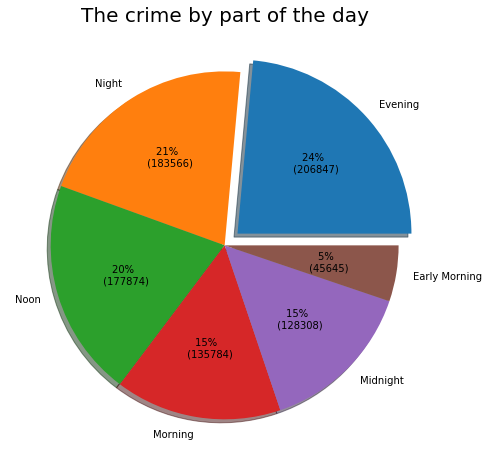

In [6]:
#Con queste 2 istruzioni togliamo i minuti dal campo Time (sennò non possiamo fare il prossimo grafico)

crime.time = crime.time.str.split(":")
crime.time = crime.time.apply(lambda x: x[0])

def make_autopct(size):
    def my_autopct(pct):
        total = sum(size)
        val = int(round(pct*total/100.0))
        return '{p:.0f}% \n ({v:d})'.format(p=pct,v=val)
    return my_autopct

labels=['Evening','Night','Noon','Morning','Midnight','Early Morning']
size=crime['part_of_day'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(size,labels=labels,explode = [0.1,0,0,0,0,0], shadow = True, autopct=make_autopct(size))
plt.title('The crime by part of the day', fontsize=20)
plt.show()

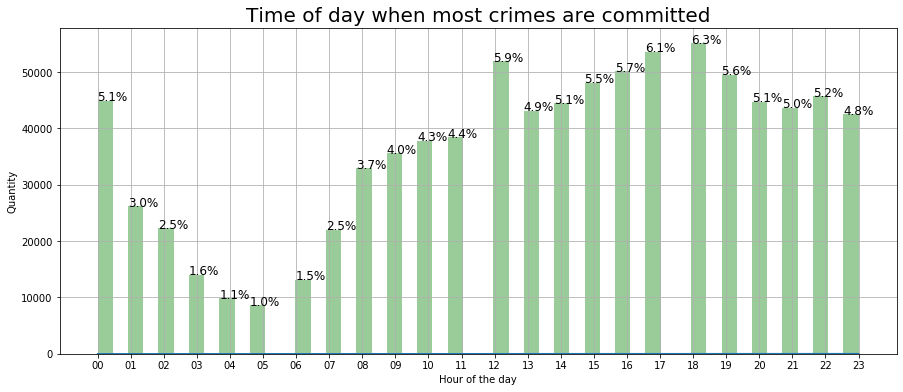

In [7]:
fig, ax = plt.subplots(figsize=(15,6))
graph = sns.distplot(crime['time'], kde=False, color='green')

totals=[]
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for p in graph.patches:
    perc = round((p.get_height()/total)*100, 1)
    if perc == 0:
        perc = ''
    else:
        graph.text(p.get_x(), p.get_height(), str(perc)+'%', fontsize=12, color='black')
        
hours = crime['time'].unique()
hours = np.sort(hours)
ax.plot(hours,range(0,24))
    
plt.title('Time of day when most crimes are committed', fontsize=20)
plt.grid()
plt.ylabel("Quantity")
plt.xlabel("Hour of the day")
plt.show()

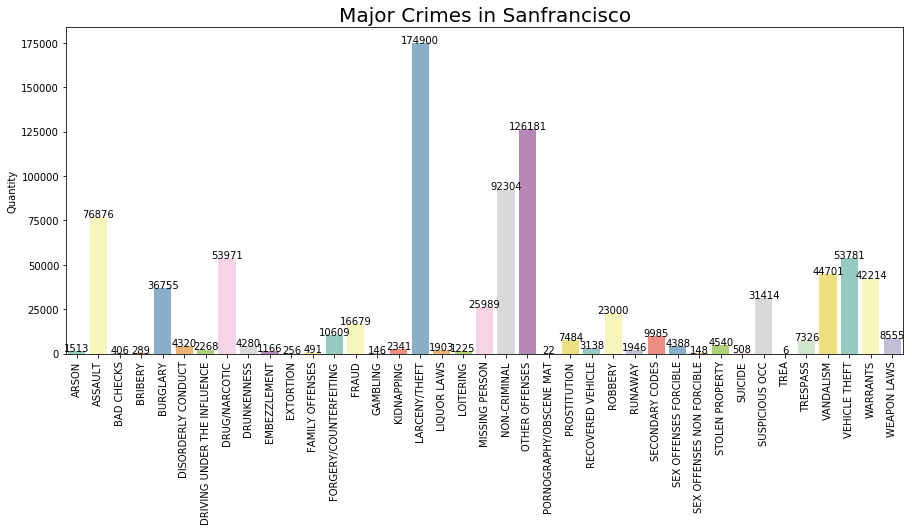

In [8]:
fig, ax1 = plt.subplots(figsize=(15,6))

crimini = crime.sort_values(by=["category"])

graph = sns.countplot(ax = ax1, x = 'category', data=crimini,  palette ='Set3')

#graph =crime['category'].value_counts().head(15).plot.bar(width=.8, color = (1, 0.3, 0)) 

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

plt.title('Major Crimes in Sanfrancisco', fontweight = 35, fontsize = 20)
plt.xticks(rotation = 90)
plt.ylabel("Quantity")
plt.xlabel("")
plt.show()

##### Qui mettiamo in evidenza quali sono i crimini più ricorrenti nella città di San Francisco; in particolare si nota come i furti sono il crimine che ha prevalso gli altri nel 2016

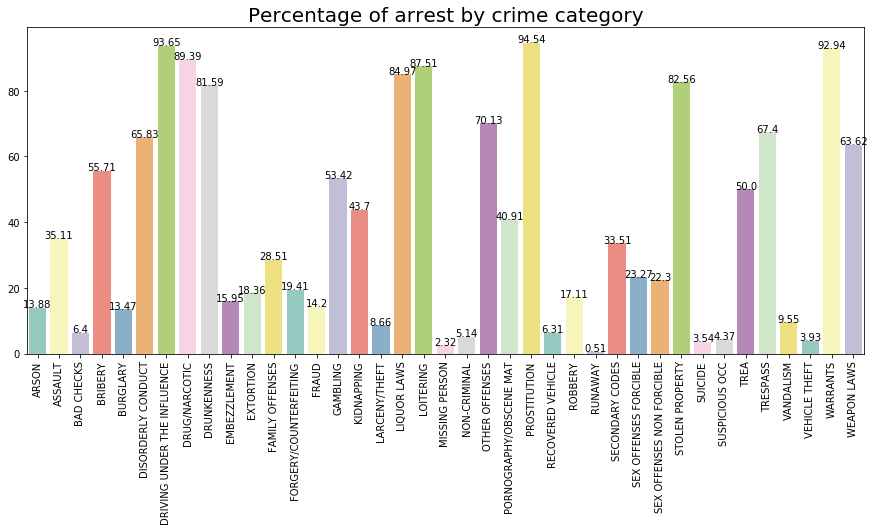

In [9]:
# create arr dataframe with information about crime and resolution

data_arrest = crime[crime.resolution.isin(["ARREST, BOOKED","ARREST, CITED"])]
arr = data_arrest.category.value_counts().reset_index()
tot = crime.category.value_counts().reset_index()

arr = arr.merge(tot, how = 'inner', on = 'index')
#inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.
arr.columns = ['category','n_arrests','n_cases']

arr['percent_arr'] = round(100*(arr['n_arrests']/arr['n_cases']),2)
arr.sort_values('category',ascending = True, inplace = True)

fig, ax1 = plt.subplots(figsize=(15,6))
graph = sns.barplot(ax = ax1, x = 'category', y = 'percent_arr', data = arr,  palette ='Set3')
#graph =crime['category'].value_counts().head(15).plot.bar(width=.8, color = (1, 0.3, 0)) 

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 0.1,height ,ha="center")

plt.title('Percentage of arrest by crime category', fontweight = 35, fontsize = 20)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.ylabel("")
plt.show()

##### Qui vediamo la percentuale dei crimini che si sono risolti con un arresto in base alle categorie di crimi avvenuti

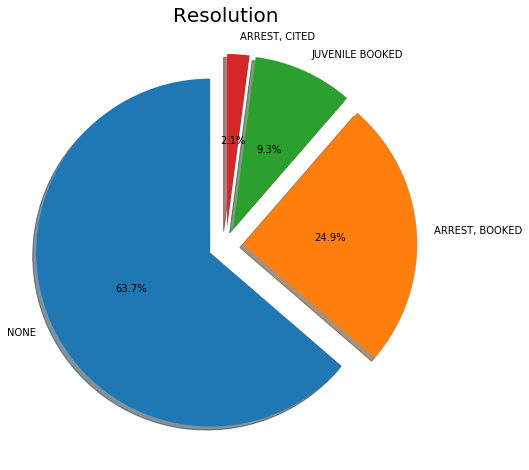

In [10]:
#crime['resolution'].value_counts().head(15).plot.pie(figsize = (15, 8))


# Grafico a torta per il risultato ottenuto sopra
labels = [ 'NONE', 'ARREST, BOOKED', 'JUVENILE BOOKED', 'ARREST, CITED']

pie, ax1 = plt.subplots(figsize=[8,8])
plt.pie(x = crime['resolution'].value_counts().head(4), explode = [0.1]*4, autopct="%.1f%%", pctdistance=0.5, labels=labels, shadow=True, startangle=90)
plt.title("Resolution", fontsize=20);

##### qui facciamo vedere in che divisione di sono risolti i crimini in cui sono intervenuti i distretti, possiamo vedere che la maggior parte non hanno avuto conseguenze, mentre il 26% si sono conclusi con un arresto

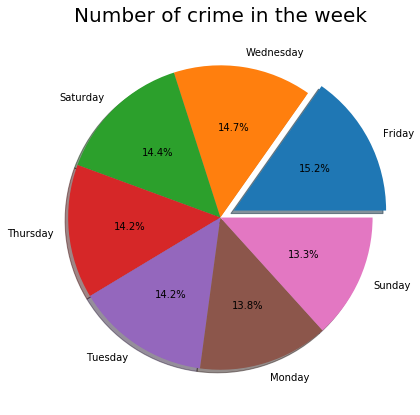

In [11]:
#Numero di crimini durante la settimana, il venerdi si nota di più
a = crime.day_of_week.value_counts(normalize = True).reset_index()
a['day_of_week'] = 100*a['day_of_week']
plt.figure(figsize = (7,7))
plt.pie(x = a['day_of_week'], labels = a['index'], explode = [0.1,0,0,0,0,0,0], shadow = True, autopct = '%1.1f%%')
plt.title('Number of crime in the week', fontweight = 30, fontsize = 20)
plt.show()

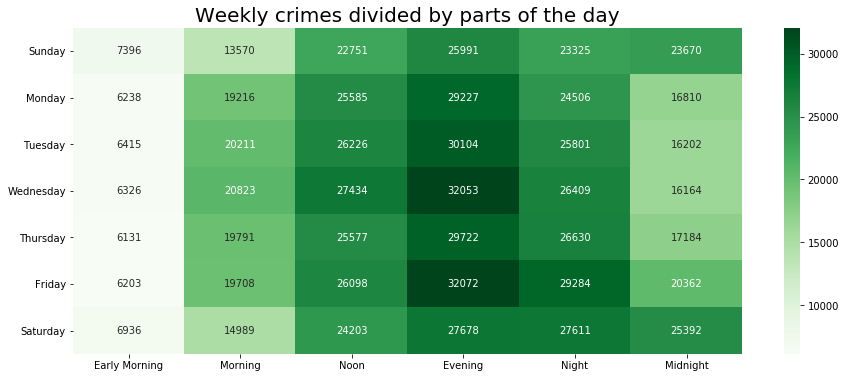

In [14]:
res = pd.pivot_table(columns = crime['part_of_day'] ,index = 'day_of_week',values = 'part_of_day' , aggfunc = 'count', data = crime)
res = res.reindex(index = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], columns = ['Early Morning','Morning','Noon','Evening','Night','Midnight'])
plt.figure(figsize = (15,6))
sns.heatmap(res, cmap = 'Greens',annot = True,fmt = 'd')
plt.xlabel('')
plt.ylabel('')
plt.title('Weekly crimes divided by parts of the day', fontweight = 30, fontsize = 20)
plt.show()

<Figure size 1080x360 with 0 Axes>

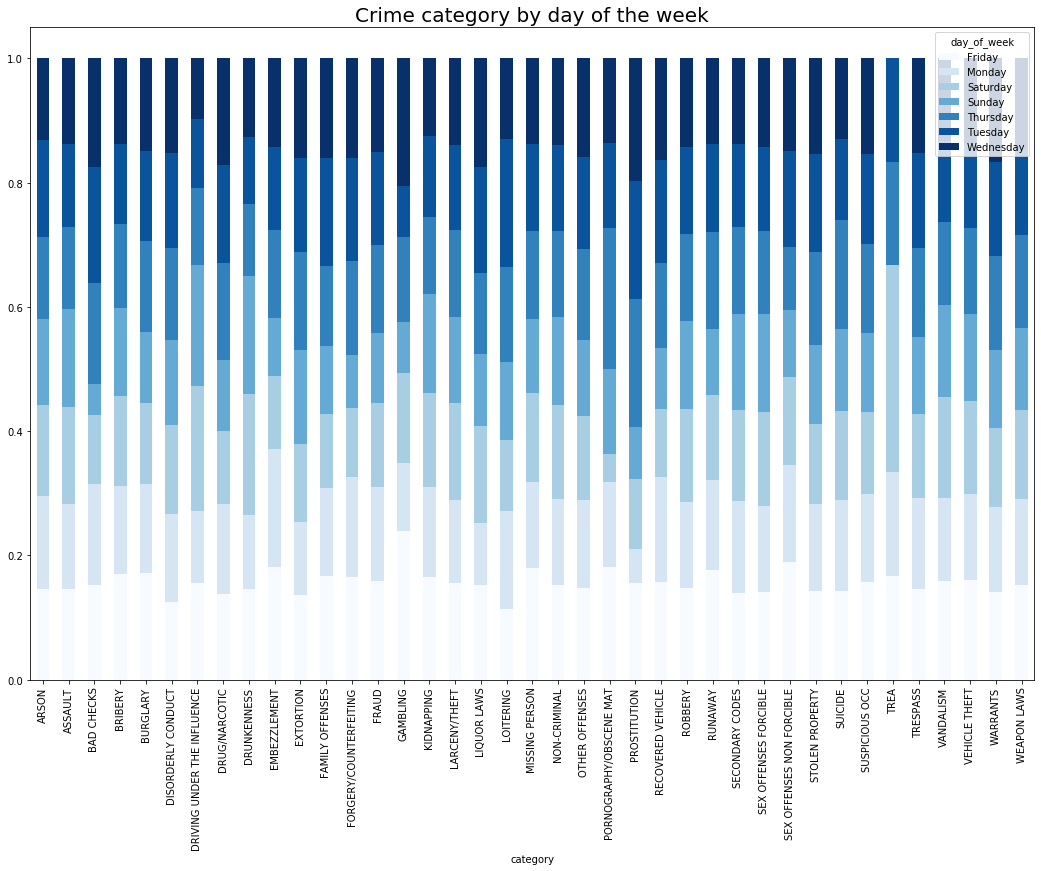

In [13]:
#Giorni della settimana con categoria di incidenti
plt.figure(figsize = (15,5))
data = pd.crosstab(crime['category'], crime['day_of_week'])
color = plt.cm.Blues(np.linspace(0,5,30))
data.div(data.sum(1).astype(float), axis = 0).plot.bar(stacked = True, color = color, figsize = (18, 12))
plt.title('Crime category by day of the week', fontweight = 30, fontsize = 20)
plt.show()

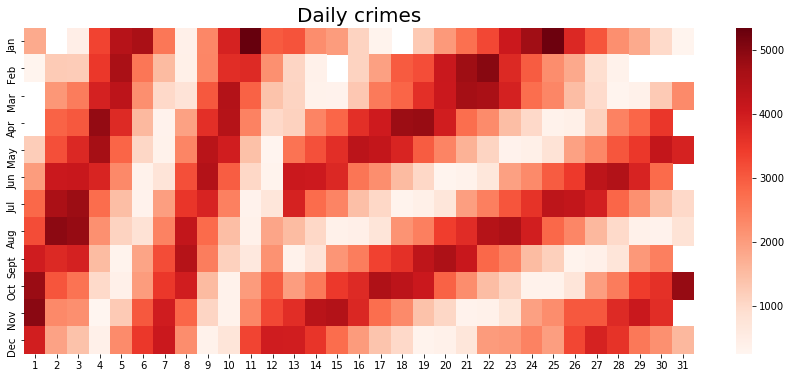

In [15]:
#creiamo le colonne day e month
crime['date'] = pd.to_datetime(crime['date'])
crime['day'] = crime['date'].dt.day
crime['month'] = crime['date'].dt.month


res = pd.pivot_table(columns = crime.day,values = 'day' ,index = 'month' , aggfunc = 'count', data = crime)
plt.figure(figsize = (15,6))
sns.heatmap(res, cmap = 'Reds')
plt.yticks(np.arange(0.5,12.5) ,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.xlabel('')
plt.ylabel('')
plt.title('Daily crimes', fontsize = 20)
plt.show()

#eliminiamo le colonne day e month
crime.drop(columns = ['day','month'], axis = 1, inplace = True)

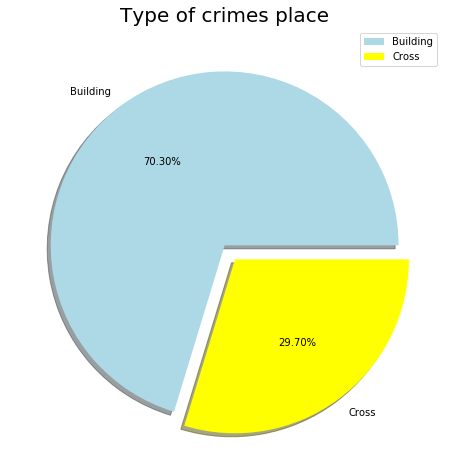

In [16]:
# Grafico a torta per il risultato ottenuto sopra
labels = ['Building', 'Cross']
size = crime['cross'].value_counts()
colors = ['lightblue', 'yellow']
explode = [0, 0.1]  # serve per distanziare le fette di torta tra loro

plt.figure(figsize=(8,8))
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Type of crimes place', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

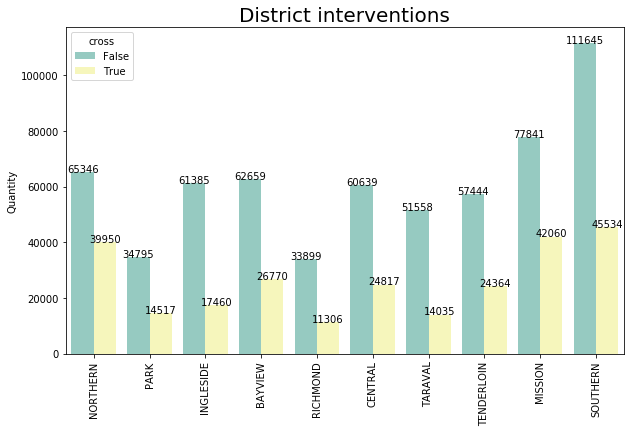

In [17]:
fig, ax1 = plt.subplots(figsize=(10,6))

graph = sns.countplot(ax = ax1, x = 'pd_district', data=crime,  palette ='Set3', hue="cross")
#graph =crime['category'].value_counts().head(15).plot.bar(width=.8, color = (1, 0.3, 0)) 

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

plt.title('District interventions', fontweight = 35, fontsize = 20)
plt.xticks(rotation = 90)
plt.ylabel("Quantity")
plt.xlabel("")
plt.show()

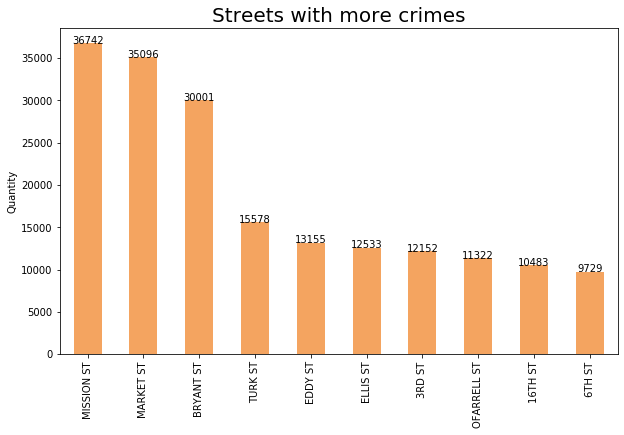

In [18]:
crime['address_min'] = crime.address.apply(lambda x: x.split(' /')[0] if (x.find('of') == -1) else x.split('of ')[1])

fig, ax1 = plt.subplots(figsize=(10,6))

s = pd.Series(crime['address_min'])
graph = s.value_counts()[:10].plot(kind="bar", color='sandybrown')

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

plt.ylabel("Quantity")
plt.xlabel("")
plt.title('Streets with more crimes', fontweight = 35, fontsize = 20)
plt.show()

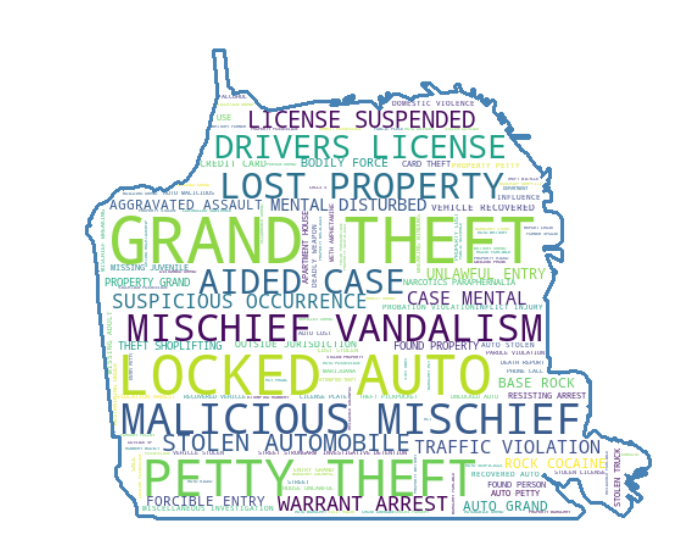

In [19]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS
strin = crime["descript"].to_string()
SFmask = np.array(Image.open("mask.png"))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=SFmask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(strin)

# show
plt.figure(figsize = (15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
#plt.figure(figsize = (15,10))
#plt.imshow(SFmask, cmap=plt.cm.gray, interpolation='bilinear')
#plt.axis("off")
plt.show()

In [20]:
import plotly.express as px

fig = px.sunburst(crime.groupby(['category', 'pd_district'])['incident_number'].count().reset_index(),
    path = ['category', 'pd_district'],
    values = 'incident_number',
    height = 750,
)
fig.show()

KeyError: 'Column not found: incident_number'

##### In questa spirale possiamo vedere la differenziazioni delle categorie dei crimini divisi ogni volta per il distretto di polizia che è intervenuto

In [21]:
#MAPPA CRIME RATE DI SAN FRANCISCO
import folium
t = crime.pd_district.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

table


gjson = r'https://cocl.us/sanfran_geojson'
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)
#generate map
sf_map.choropleth(
    geo_data=gjson,
    data=table,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

sf_map